# **Importing all the libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv('/content/CVD_cleaned (1).csv')

# **Data Preprocessing and EDA**

In [3]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [4]:
df.shape

(89807, 19)

Check for null values

In [5]:
#check for null values
df.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    1
Height_(cm)                     1
Weight_(kg)                     1
BMI                             1
Smoking_History                 1
Alcohol_Consumption             1
Fruit_Consumption               1
Green_Vegetables_Consumption    1
FriedPotato_Consumption         1
dtype: int64

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Height_(cm),89806.0,170.683161,10.730898,91.00,163.00,170.00,178.00,234.00
Weight_(kg),89806.0,83.290999,21.428187,25.40,68.04,81.19,95.25,293.02
BMI,89806.0,28.496850,6.533579,12.16,24.11,27.40,31.62,98.44
Alcohol_Consumption,89806.0,5.065430,8.185930,0.00,0.00,1.00,6.00,30.00
Fruit_Consumption,89806.0,29.586709,24.796373,0.00,12.00,30.00,30.00,120.00
Green_Vegetables_Consumption,89806.0,15.215687,15.113591,0.00,4.00,12.00,20.00,120.00
FriedPotato_Consumption,89806.0,6.464980,8.758146,0.00,2.00,4.00,8.00,120.00


Check for Duplicate Values, drop if any

In [7]:
#check duplicate values
df.duplicated().sum()


9

In [8]:
#drop the duplicated values
df.drop_duplicates()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89802,Excellent,Within the past 5 years,No,No,No,No,No,No,No,Male,55-59,183.0,136.08,40.69,Yes,0.0,8.0,4.0,0.0
89803,Fair,Within the past year,Yes,No,No,No,Yes,No,Yes,Male,50-54,168.0,77.11,27.44,Yes,1.0,0.0,0.0,7.0
89804,Poor,Within the past year,No,Yes,Yes,No,Yes,Yes,Yes,Male,60-64,188.0,116.12,32.87,Yes,15.0,0.0,2.0,0.0
89805,Good,Within the past year,Yes,Yes,No,No,No,"No, pre-diabetes or borderline diabetes",Yes,Female,70-74,163.0,74.84,28.32,No,0.0,60.0,30.0,3.0


In [9]:
df.shape

(89807, 19)

In [10]:
#Checking the number of unique values
df.select_dtypes(include='object').nunique()

General_Health      5
Checkup             5
Exercise            2
Heart_Disease       2
Skin_Cancer         2
Other_Cancer        2
Depression          2
Diabetes            4
Arthritis           2
Sex                 2
Age_Category       13
Smoking_History     2
dtype: int64

# **Visualizing the data**

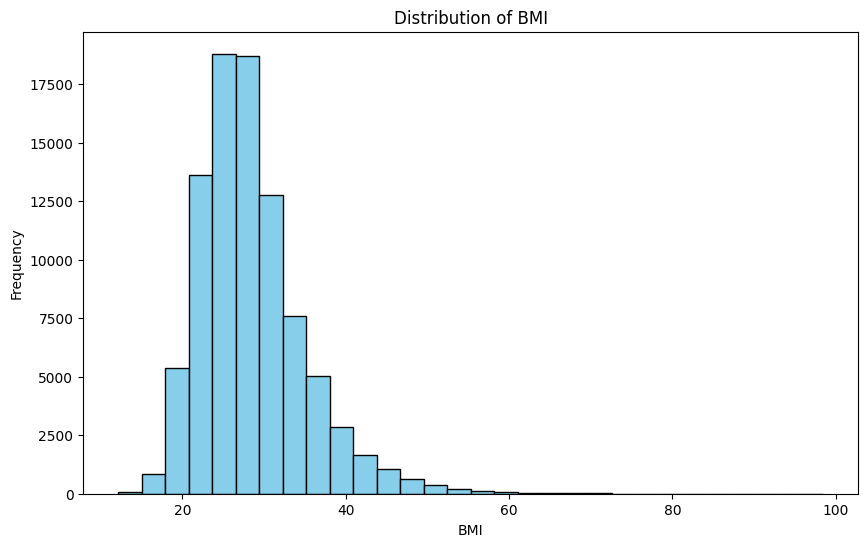

In [11]:
#histogram for BMI
plt.figure(figsize=(10, 6))
plt.hist(df['BMI'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()


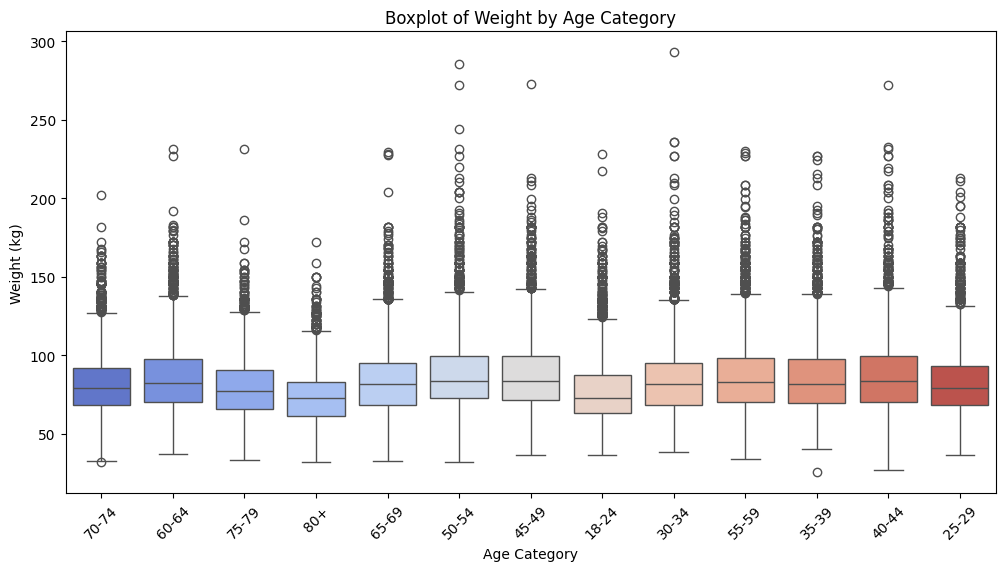

In [12]:
#boxplot for Age_category and Weight_(kg)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Age_Category', y='Weight_(kg)', data=df, palette='coolwarm')
plt.title('Boxplot of Weight by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Weight (kg)')
plt.xticks(rotation=45)
plt.show()

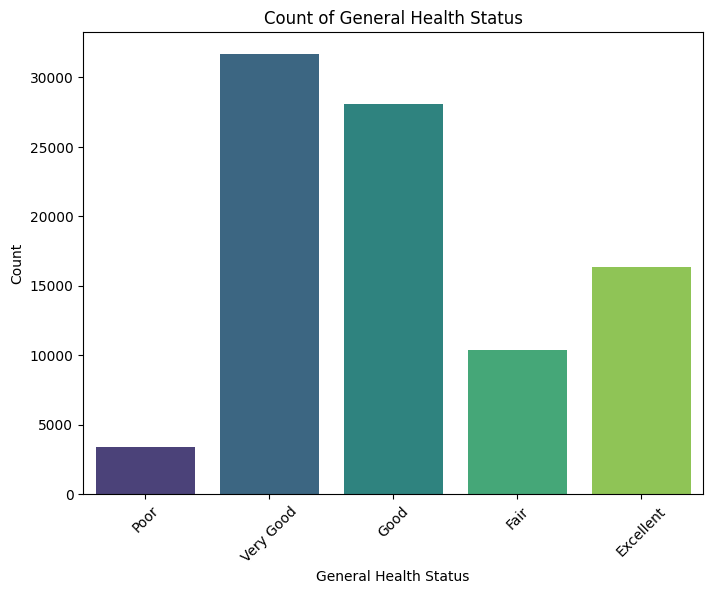

In [13]:
#Count plot for General_Health
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='General_Health', palette='viridis')
plt.title('Count of General Health Status')
plt.xlabel('General Health Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


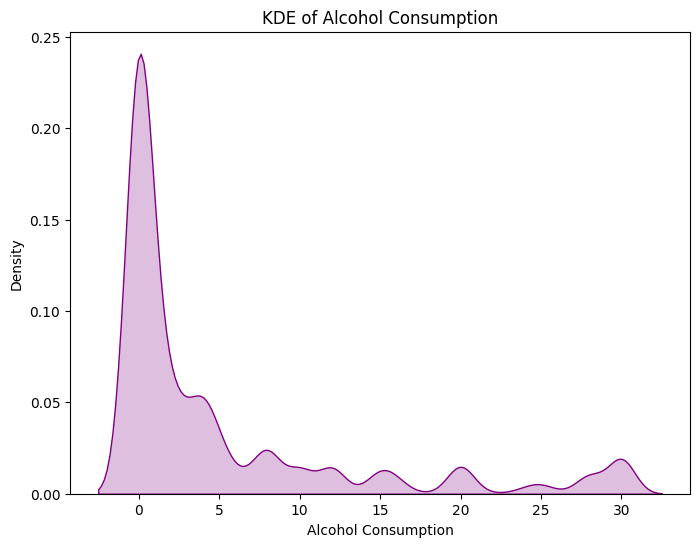

In [14]:
#Kernel Density Estimation (KDE) for Alcohol_Consumption:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['Alcohol_Consumption'], shade=True, color='purple')
plt.title('KDE of Alcohol Consumption')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Density')
plt.show()

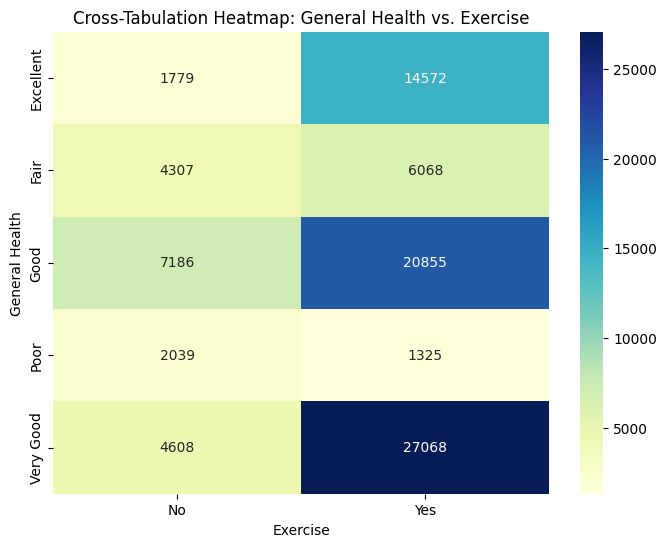

In [15]:
#General_Health and Exercise Cross-tab HeatMap
crosstab = pd.crosstab(df['General_Health'], df['Exercise'])
plt.figure(figsize=(8, 6))
sns.heatmap(crosstab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Cross-Tabulation Heatmap: General Health vs. Exercise')
plt.xlabel('Exercise')
plt.ylabel('General Health')
plt.show()


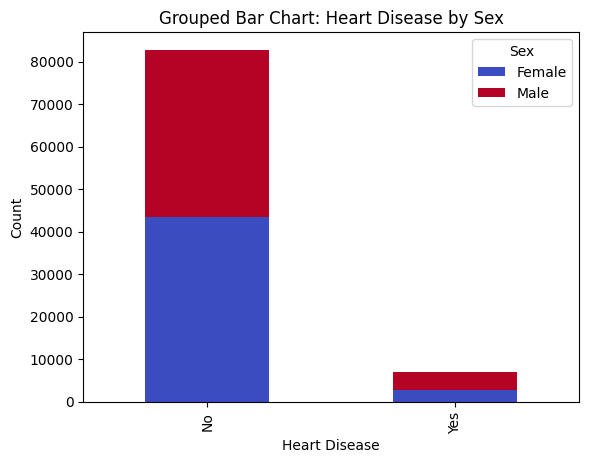

In [16]:
#Grouped Bar Chart for Hear_Disease and Sex
grouped = df.groupby(['Heart_Disease', 'Sex']).size().unstack()
grouped.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Grouped Bar Chart: Heart Disease by Sex')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()


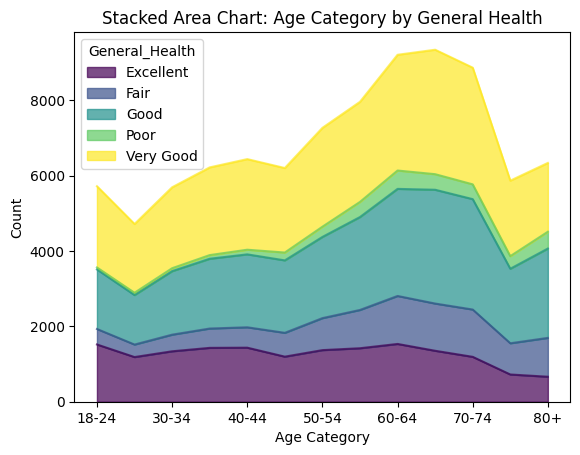

In [17]:
#Stacked Area Chart Age_Category by General_Health.
crosstab = pd.crosstab(df['Age_Category'], df['General_Health'])
crosstab.plot(kind='area', colormap='viridis', alpha=0.7, stacked=True)
plt.title('Stacked Area Chart: Age Category by General Health')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.show()

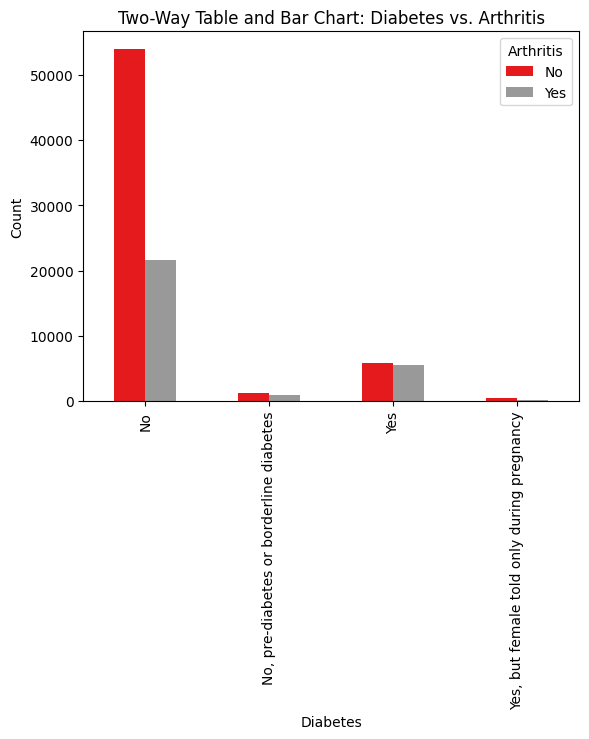

In [18]:
#Diabetes and Arthritis
table = pd.crosstab(df['Diabetes'], df['Arthritis'])
table.plot(kind='bar', colormap='Set1')
plt.title('Two-Way Table and Bar Chart: Diabetes vs. Arthritis')
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.show()


In [19]:
# Create a copy of the DataFrame to avoid modifying the original
df_encoded = df.copy()

# Create a label encoder object
label_encoder = LabelEncoder()

# Iterate through each object column and encode its values
for column in df_encoded.select_dtypes(include='object'):
    df_encoded[column] = label_encoder.fit_transform(df_encoded[column])

# Now, df_encoded contains the label-encoded categorical columns
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


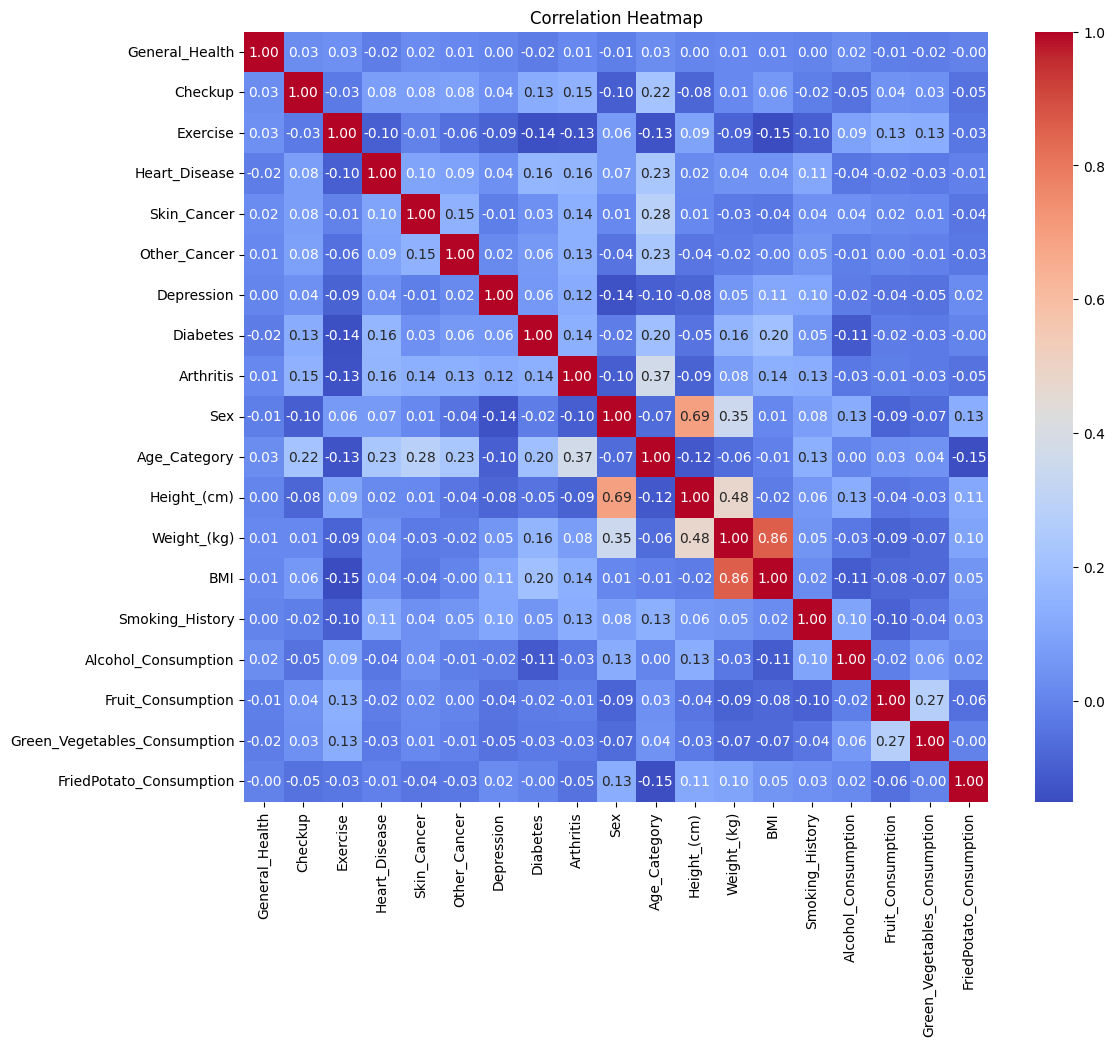

In [20]:
# Calculate the correlation matrix for Data
correlation_matrix = df_encoded.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


# **Check for class imbalance and sampling**

In [27]:
#CHECK THE CLASS VARIABLE
df_encoded['General_Health'].value_counts()

4    31676
2    28041
0    16351
1    10375
3     3364
Name: General_Health, dtype: int64

In [30]:
X = df_encoded.drop("General_Health", axis = 1)
y = df_encoded['General_Health']

In [31]:
print(X)


       Checkup  Exercise  Heart_Disease  Skin_Cancer  Other_Cancer  \
0            2         0              0            0             0   
1            4         0              1            0             0   
2            4         1              0            0             0   
3            4         1              1            0             0   
4            4         0              0            0             0   
...        ...       ...            ...          ...           ...   
89802        3         0              0            0             0   
89803        4         1              0            0             0   
89804        4         0              1            1             0   
89805        4         1              1            0             0   
89806        4         0              0            0             0   

       Depression  Diabetes  Arthritis  Sex  Age_Category  Height_(cm)  \
0               0         0          1    0            10        150.0   
1          

**LOGISTIC REGRESSION**

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time

# Generate synthetic data
X, y = make_classification(n_samples=10000, n_features=20, n_classes=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create logistic regression model
start_time = time.time()
log_reg = LogisticRegression(max_iter=1000)  # You can tune max_iter for convergence
log_reg.fit(X_train, y_train)
end_time = time.time()

# Predict on test set
y_pred = log_reg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)




Accuracy: 0.8945


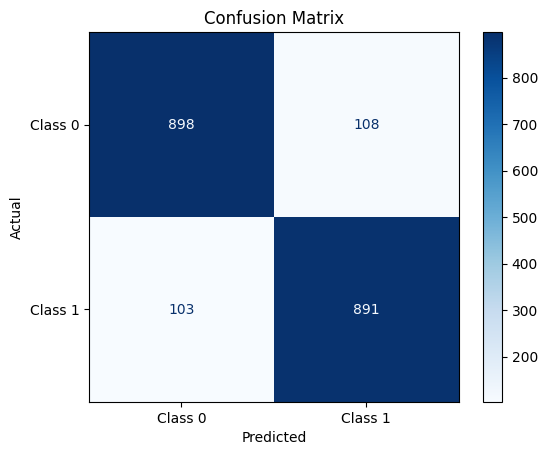

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])  # Replace labels as needed
disp.plot(cmap='Blues', values_format='d')

# Add labels and a title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


# **Decision Tree Classifier**

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Assuming X and y are your input features and target variable respectively
# Replace NaN values with mean
X = np.nan_to_num(X, nan=np.mean(X))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train a Decision Tree Classifier model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Classifier Accuracy Score:", accuracy)


Decision Tree Classifier Accuracy Score: 0.895


# **Random Forest Classifier**

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Assuming X and y are your input features and target variable respectively
# Replace NaN values with mean
X = np.nan_to_num(X, nan=np.mean(X))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train a Random Forest Classifier model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Classifier Accuracy Score:", accuracy)


Random Forest Classifier Accuracy Score: 0.9356666666666666


**KNN**

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Assuming X and y are your input features and target variable respectively
# Replace NaN values with mean
X = np.nan_to_num(X, nan=np.mean(X))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train a KNN Classifier model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("K-Nearest Neighbors (KNN) Classifier Accuracy Score:", accuracy)


K-Nearest Neighbors (KNN) Classifier Accuracy Score: 0.8733333333333333


**NB**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train a Gaussian Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Naive Bayes Classifier Accuracy Score:", accuracy)


Naive Bayes Classifier Accuracy Score: 0.8399498537400752
